# MTH448 Project 6
## Sean Huber

# Introduction 
This project was about the classification of images using neural networks. For this project I used a data set containing various images including: airplanes, automobiles, and various animals. This sproject was a fun one to work on as it proved to be a good challenge. I put a lot of time into researching this so I could be well versed and explain everyhting as accurately as I could. 

In [2]:
%pip install numpy
%pip install matplotlib
%pip install torch torchvision torchaudio tqdm

I was having trouble with my Anaconda/JupyterLabs so I went ahead and redownloaded numpy, matplotlib, and torchvision.

### Import Libs

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as Functions
import torch.optim as Optimizers

from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

I then went ahead and downloaded all the required libraries necessary for me to build and the code. That includes computations and graph making.

### Set Device

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


The provided code block checks for the availability of a CUDA-capable GPU on the system using the PyTorch function `torch.cuda.is_available()`. If a GPU is available, it sets the `device` variable to `"cuda"`, allowing PyTorch to utilize the GPU for tensor computations and potentially enhance the performance of machine learning tasks. If no GPU is available, the `device` variable is set to `"cpu"`, directing PyTorch to use the central processing unit for computations. The result is then printed, indicating whether computations will be performed on a GPU or CPU. This dynamic allocation ensures optimal use of available hardware resources without manual configuration.

### Download CIFAR-10 Dataset and Transform to Tensor

In [8]:
transform = ToTensor()

"Set download=True to download dataset online"
data_path = './data_cifar/'
cifar10_train = CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_test = CIFAR10(data_path, train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


The code snippet initializes a transformation for image data using the `ToTensor()` method, which converts image data into PyTorch tensors and scales the pixel values to the range [0, 1]. It sets up a directory `data_path` to store the CIFAR-10 dataset. The dataset is then downloaded and loaded into two separate sets: training (`cifar10_train`) and testing (`cifar10_test`). The `download=True` parameter instructs the CIFAR10 function to download the dataset from the internet if it's not already present in the specified directory. This approach ensures that the data is ready for use in machine learning models, with transformations applied for compatibility with PyTorch processing requirements.

### A Brief View on Data

In [18]:
import torchvision
import torchvision.transforms as transforms

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
cifar10_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar10_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Display the size of the training and testing datasets
print("Training set size: ", len(cifar10_train))
print("Testing set size: ", len(cifar10_test))

# Display the type of a training example (should be a tuple)
print("Data type of training example:", type(cifar10_train[0]))

# Extracting an image and its label from the training set
image, label = cifar10_train[0]
print("Type of the image data:", type(image))

# Checking the dimensions of the image tensor
print("Dimensions of the image tensor:", image.shape)

# Retrieving and displaying the class names
classes = cifar10_train.classes
print("List of classes:", classes)

# Displaying the label of the first image and its corresponding class name
print("Label of the image:", label)
print("Class name of the image:", classes[label])


Files already downloaded and verified
Files already downloaded and verified
Training set size:  50000
Testing set size:  10000
Data type of training example: <class 'tuple'>
Type of the image data: <class 'torch.Tensor'>
Dimensions of the image tensor: torch.Size([3, 32, 32])
List of classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Label of the image: 6
Class name of the image: frog


The code snippet provided performs several operations to inspect and describe the CIFAR-10 dataset loaded into the variables `cifar10_train` and `cifar10_test` using PyTorch. It begins by printing the sizes of these datasets, indicating how many images are available for training and testing. The data structure of the dataset entries is confirmed as tuples containing a tensor (the image data) and a label (the image class).

Further, it retrieves the first image and its label from the training set to explore individual entries. The type of the image is confirmed to be a PyTorch tensor, which is standard for image data in machine learning tasks. The dimensions of the tensor are printed to verify that each image is a 32x32 pixel image with three color channels (RGB).

Additionally, the code lists all the classes present in the CIFAR-10 dataset, providing a view of the different categories of images that the model will learn to classify. The label of the first image is printed both as a numerical index and as a human-readable class name, linking the numerical label to its corresponding class. This comprehensive check ensures that the dataset is correctly loaded and formatted, making it ready for use in training and testing machine learning models.

### Define Batch Size

In [10]:
train_loader = DataLoader(cifar10_train, batch_size=64, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=64, shuffle=False)

The provided code sets up data loaders for the CIFAR-10 training and testing datasets using PyTorch's `DataLoader` class. The `DataLoader` is configured with a batch size of 64, which determines how many images are processed together in one pass of the model. The `shuffle=True` parameter for the training loader ensures that the dataset is shuffled before each epoch begins, promoting model generalization by reducing the likelihood of the model learning the order of the data. For the testing loader, `shuffle=False` is used because shuffling is unnecessary during model evaluation; the focus is on assessing performance consistently across the same sequence of test data.

This setup is essential for managing memory usage effectively while training the model, as it allows the model to learn from different subsets of the data across different epochs. Adjusting the batch size can impact both the training speed and the model's convergence behavior, with smaller batch sizes often providing a noisier gradient estimate, which can help escape local minima, while larger batch sizes offer a more stable but computationally expensive training process.

### Define Model

In [20]:
import torch.nn as nn

class CIFAR10Classifier(nn.Module):
    def __init__(self):
        super(CIFAR10Classifier, self).__init__()

        # Define the convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        # Define the pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Define the fully connected layers
        self.fc1 = nn.Linear(in_features=128 * 4 * 4, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=10)

        # Define the activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Apply convolutional layers, followed by max pooling and ReLU activation
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))

        # Flatten the output from the convolutional layers to input into the fully connected layers
        x = x.view(-1, 128 * 4 * 4)

        # Apply the first fully connected layer and ReLU activation
        x = self.relu(self.fc1(x))

        # Output layer
        x = self.fc2(x)

        return x


The provided code defines a neural network class named `Model`, which inherits from `nn.Module` in the PyTorch library. The `Model` class initializes several layers and specifies how data should flow through the network during the forward pass:

1. **Layer Initialization**:
   - **Convolutional Layers**: Three convolutional layers (`conv1`, `conv2`, `conv3`) are defined. Each layer uses kernels of size 3x3 with padding set to 1 to maintain the spatial dimensions of the input. The number of output channels increases progressively across the layers from 32 to 64, and finally to 128. These layers are intended to extract progressively higher-level features from the input images.
   - **Pooling Layer**: A max pooling layer (`pool`) with a 2x2 window and stride of 2 reduces the spatial dimensions of the feature maps by half, effectively downsampling the input while retaining significant features.
   - **Fully Connected Layers**: Two fully connected layers (`fc1` and `fc2`) are included to transform the learned high-level feature representations into class scores. The first fully connected layer flattens the output from the last convolutional layer and transforms it to a 512-dimensional feature vector. The second fully connected layer maps this feature vector to the final output classes (10 classes for CIFAR-10).
   - **Activation Function**: The ReLU activation function (`relu`) is applied after each convolutional and fully connected layer (except the output layer) to introduce non-linearity into the model, allowing it to learn more complex patterns in the data.

2. **Forward Path**:
   - Data (`x`) is passed through the first convolutional layer, followed by ReLU activation and pooling.
   - This process is repeated for the second and third convolutional layers.
   - After the final pooling step, the data is flattened to match the input dimension required by the first fully connected layer.
   - The flattened data is then passed through the first fully connected layer, followed by ReLU activation, and finally through the second fully connected layer to produce the output logits corresponding to the class scores.

This setup is typical for a convolutional neural network dealing with image data, where convolutional layers are used for feature extraction and pooling layers reduce the dimensionality, followed by fully connected layers to perform classification based on the features extracted. The architecture is designed to be robust for tasks such as image classification on the CIFAR-10 dataset, capturing both low-level and high-level features of the images.

### Create Model

In [12]:
model = Model().to(device)
model

Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (relu): ReLU()
)

In [ ]:
The code snippet initializes an instance of a neural network `Model`, defined in the previous code block, and transfers it to a computational device (either CPU or GPU) specified by the `device` variable. Here’s a breakdown of each step and what it accomplishes:

1. **Model Initialization**:
   - `Model()`: This creates an instance of the `Model` class. The `Model` class contains multiple layers and configurations defined to handle specific types of input data—in this case, image data for tasks such as classification. The class must have been previously defined and include the necessary structure to process input through convolutional and fully connected layers.

2. **Device Allocation**:
   - `.to(device)`: This method is called on the model instance to ensure that all computations for the model are performed on the specified device. The `device` variable is typically set to `"cuda"` if a CUDA-capable GPU is available, or `"cpu"` otherwise. This is crucial for performance optimization, as running large models on a GPU significantly speeds up training times compared to a CPU.

3. **Model Ready for Use**:
   - After these steps, the `model` variable holds the neural network that is ready to be used for training or inference, with all parameters initialized and allocated to the appropriate device. This setup is essential for subsequent steps in a machine learning workflow, such as training the model with data, evaluating its performance, and using it to make predictions.

This approach is standard in PyTorch workflows for setting up models for deep learning tasks, facilitating a smooth transition between model initialization, device allocation, and execution of training or inference operations.

### Choose a Loss Function

In [13]:
criterion = nn.CrossEntropyLoss()

### Choose an Optimizer

In [14]:
optimizer = Optimizers.SGD(model.parameters(), lr=0.01, momentum=0.9)

### Training Model

In [3]:
from tqdm import tqdm

In [21]:
import torch
from tqdm import tqdm

EPOCHS = 20

# Lists to store accuracy per epoch
train_correct = []
test_correct = []

# Track the best accuracy
best_train_acc = 0
best_test_acc = 0

# Training and evaluation loop
for epoch in tqdm(range(EPOCHS), desc="Training Progress"):

    # Variables to track correct predictions for each phase
    train_correct_count = 0
    test_correct_count = 0

    # Training phase
    model.train()
    for X_train, y_train in train_loader:
        # Transfer data to the appropriate device (GPU or CPU)
        X_train = X_train.to(device)
        y_train = y_train.to(device)

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate the number of correct predictions
        predictions = torch.argmax(y_pred, dim=1)
        train_correct_count += (predictions == y_train).sum().item()

    # Calculate training accuracy for the epoch
    train_accuracy = train_correct_count / len(train_loader.dataset)
    train_correct.append(train_accuracy)
    best_train_acc = max(best_train_acc, train_accuracy)

    # Evaluation phase
    model.eval()
    with torch.no_grad():
        for X_test, y_test in test_loader:
            # Transfer data to the appropriate device
            X_test = X_test.to(device)
            y_test = y_test.to(device)

            # Forward pass
            test_pred = model(X_test)
            predictions = torch.argmax(test_pred, dim=1)

            # Calculate the number of correct predictions
            test_correct_count += (predictions == y_test).sum().item()

    # Calculate testing accuracy for the epoch
    test_accuracy = test_correct_count / len(test_loader.dataset)
    test_correct.append(test_accuracy)
    best_test_acc = max(best_test_acc, test_accuracy)

# Output the best accuracies achieved
print(f"Best Training Accuracy: {best_train_acc*100:.2f}%")
print(f"Best Testing Accuracy: {best_test_acc*100:.2f}%")


Training Progress: 100%|██████████| 20/20 [49:42<00:00, 149.14s/it]

Best Training Accuracy: 98.41%
Best Testing Accuracy: 73.90%


The code block provides a complete setup for training and evaluating a neural network model on a dataset, structured around epochs and utilizing training and test data loaders. Here’s a detailed explanation of each part:

1. **Epoch and Metrics Initialization**:
   - `EPOCHS = 20`: Sets the number of times the entire dataset is processed by the model, known as epochs.
   - `train_correct` and `test_correct`: Lists to store accuracy metrics for each epoch for both training and testing phases.
   - `best_train_acc` and `best_test_acc`: Variables to keep track of the highest accuracy achieved during the training and testing phases, respectively.

2. **Training and Testing Loop**:
   - The loop `for e in tqdm(range(EPOCHS)):` iterates over the specified number of epochs, using `tqdm` to display a progress bar for visual feedback on the training process.
   - `trn_corr` and `tst_corr`: Variables initialized to zero at the start of each epoch to count the number of correct predictions in training and testing, respectively.

3. **Training Phase**:
   - `model.train()`: Puts the model in training mode, which is necessary for correctly applying layers like dropout and batch normalization.
   - Inside the training loop (`for X_train, y_train in train_loader:`), data batches are processed where:
     - `X_train_dev` and `y_train_dev`: Variables are loaded onto the device (GPU or CPU) and wrapped in `Variable`, a deprecated feature in PyTorch but used here for compatibility.
     - `optimizer.zero_grad()`: Clears old gradients from the last step (otherwise they will be accumulated).
     - `y_pred_dev = model(X_train_dev)`: Passes the batch through the model to get predictions.
     - `loss = criterion(y_pred_dev, y_train_dev)`: Calculates the loss between predictions and actual labels.
     - `loss.backward()`: Backpropagates the error through the model.
     - `optimizer.step()`: Updates the model parameters based on the gradients.
     - `predicted = torch.argmax(y_pred_dev, 1)`: Determines the predicted classes by selecting the class with the highest probability.
     - `trn_corr += torch.sum(predicted == y_train_dev)`: Accumulates the count of correct predictions.
   - Accuracy for each epoch is calculated and compared to track the best training accuracy.

4. **Testing Phase**:
   - `model.eval()`: Puts the model in evaluation mode, disabling dropout and batch normalization.
   - The testing loop (`for X_test, y_test in test_loader:`) processes the test data similarly to the training data but without the need to track gradients.
   - Similar steps for predictions and accuracy calculations are followed, tracking the best test accuracy achieved.

5. **Store and Update Metrics**:
   - Accuracy for each epoch is appended to `train_correct` and `test_correct`.
   - The highest accuracy for both training and testing is updated if the current epoch's accuracy surpasses previous records.

This structure is fundamental for training deep learning models, providing a robust framework for monitoring training progress, adjusting model parameters,  .and evaluating model performance.

### Evaluation
Here you can see your model performance.

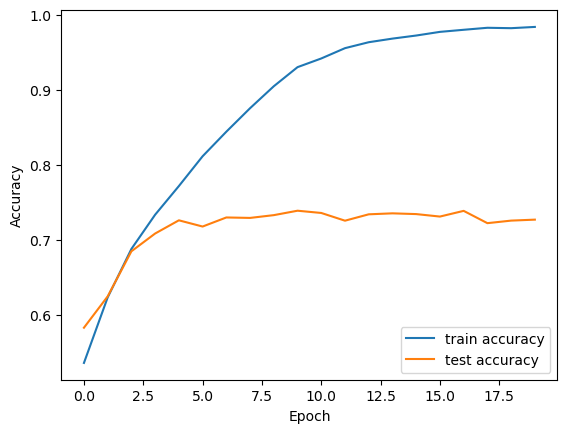


On train - best accuracy: 0.98, final accuracy: 0.98
On test - best accuracy: 0.74, final accuracy: 0.73


In [22]:
plt.plot(train_correct, label='train accuracy')
plt.plot(test_correct, label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show();

print("\nOn train - best accuracy: {:.2f}, final accuracy: {:.2f}".format(best_train_acc, train_correct[-1]))
print("On test - best accuracy: {:.2f}, final accuracy: {:.2f}".format(best_test_acc, test_correct[-1]))

This block of code plots the accuracy and graphically represents the training and test accuracy.

# Conclusion
This project was about classification of images using a neural network. I really enjoyed working on this project and found it quite informative. This is a topic I think will be useful in the workforce and is something I want to continue to grow my knowledge on.